In [14]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from agots.multivariate_generators.multivariate_shift_outlier_generator import MultivariateShiftOutlierGenerator
from agots.multivariate_generators.multivariate_trend_outlier_generator import MultivariateTrendOutlierGenerator
from agots.multivariate_generators.multivariate_variance_outlier_generator import MultivariateVarianceOutlierGenerator
from agots.multivariate_generators.multivariate_data_generator import MultivariateDataGenerator
from agots.multivariate_generators.multivariate_extreme_outlier_generator import MultivariateExtremeOutlierGenerator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


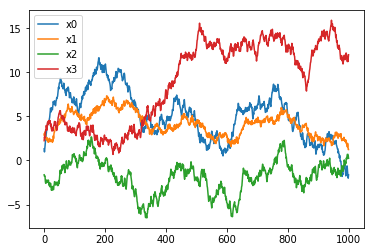

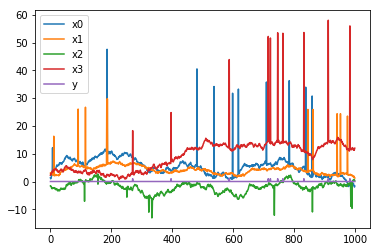

,x0,x1,x2,x3,y
0,1.330106,3.000000,-1.618891,2.244998,0
1,0.970960,2.790380,-1.795467,2.680267,0
2,1.291141,3.230361,-1.730158,2.530218,0
3,1.688795,3.030049,-1.902327,2.912778,0
4,2.117202,3.101420,-2.401386,3.129198,0
5,2.236750,2.531633,-2.587374,3.499921,0
6,2.694172,2.542660,-2.584866,3.482068,0
7,12.143716,2.368553,-2.213396,3.974022,0
8,3.388750,2.322347,-2.312049,3.697179,0
9,3.581006,2.601257,-2.461260,3.443867,0


In [18]:
def generate_extreme_outliers():
    STREAM_LENGTH = 1000
    N = 4
    K = 2
    
    dg = MultivariateDataGenerator(STREAM_LENGTH, N, K, shift_config={1: 25, 2:20})
    df = dg.generate_baseline(initial_value_min=-4, initial_value_max=4)

    for col in df.columns:
        plt.plot(df[col], label=col)
    plt.legend()
    plt.show()
    
    df['y'] = np.zeros(STREAM_LENGTH)

    for timeseries in range(N):
        num_outliers = 10
        outlier_pos = random.sample(range(STREAM_LENGTH), num_outliers)

        timestamps = []
        for outlier in outlier_pos:
            timestamps.append((outlier,))

        df = dg.add_outliers({'extreme': [{'n': timeseries, 'timestamps': timestamps}]})
        df['y'] = np.where(df.index.isin(outlier_pos), 1, 0)
    for col in df.columns:
        plt.plot(df[col], label=col)
    plt.legend()
    plt.show()
    return df
generate_extreme_outliers()

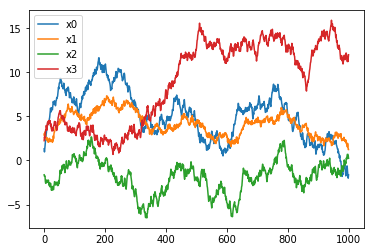

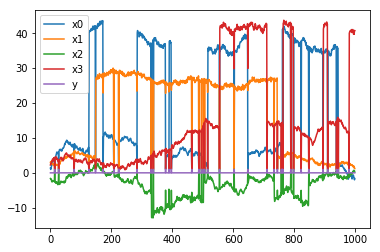

(array([ 14,  27,  78, 126, 148, 173, 208, 224, 225, 284, 331, 338, 378,
        389, 397, 464, 487, 496, 503, 506, 516, 555, 603, 648, 711, 734,
        745, 758, 761, 763, 789, 798, 823, 848, 895, 910, 939, 945, 980]),)

In [25]:
def generate_shift_outliers():
    STREAM_LENGTH = 1000
    N = 4
    K = 2
    
    dg = MultivariateDataGenerator(STREAM_LENGTH, N, K, shift_config={1: 25, 2:20})
    df = dg.generate_baseline(initial_value_min=-4, initial_value_max=4)

    for col in df.columns:
        plt.plot(df[col], label=col)
    plt.legend()
    plt.show()
    
    df['y'] = np.zeros(STREAM_LENGTH)

    for timeseries in range(N):
        num_outliers = 10
        outlier_pos = random.sample(range(STREAM_LENGTH), num_outliers)

        timestamps = []
        for i in range(0, len(outlier_pos), 2):
            timestamps.append((outlier_pos[i], outlier_pos[i+1]))

        df = dg.add_outliers({'shift': [{'n': timeseries, 'timestamps': timestamps}]})
        df[df.index.isin(outlier_pos)] = 1
    for col in df.columns:
        plt.plot(df[col], label=col)
    plt.legend()
    plt.show()
    return df, df['y']

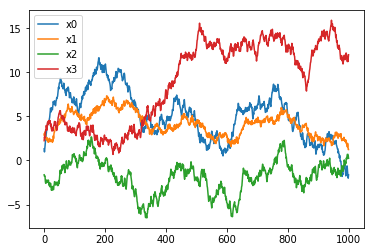

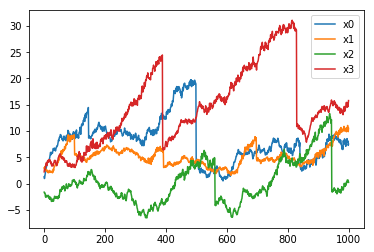

,x0,x1,x2,x3
0,1.330106,3.000000,-1.618891,2.244998
1,0.970960,2.790380,-1.795467,2.680267
2,1.291141,3.230361,-1.730158,2.530218
3,1.688795,3.030049,-1.902327,2.912778
4,2.117202,3.101420,-2.401386,3.129198
5,2.236750,2.531633,-2.587374,3.499921
6,2.694172,2.542660,-2.584866,3.482068
7,3.075173,2.368553,-2.213396,3.974022
8,3.388750,2.322347,-2.312049,3.697179
9,3.581006,2.601257,-2.461260,3.443867


In [11]:
def generate_trend_outliers():
    STREAM_LENGTH = 1000
    N = 4
    K = 2
    
    dg = MultivariateDataGenerator(STREAM_LENGTH, N, K, shift_config={1: 25, 2:20})
    df = dg.generate_baseline(initial_value_min=-4, initial_value_max=4)

    for col in df.columns:
        plt.plot(df[col], label=col)
    plt.legend()
    plt.show()
    
    df['y'] = np.zeros(STREAM_LENGTH)

    for timeseries in range(N):
        num_outliers = 10
        outlier_pos = random.sample(range(STREAM_LENGTH), num_outliers)

        timestamps = []
        for i in range(0, len(outlier_pos), 2):
            timestamps.append((outlier_pos[i], outlier_pos[i+1]))

        df = dg.add_outliers({'trend': [{'n': timeseries, 'timestamps': timestamps}]})
        df[df.index.isin(outlier_pos)] = 1
    for col in df.columns:
        plt.plot(df[col], label=col)
    plt.legend()
    plt.show()
    return df, df['y']
generate_trend_outliers()

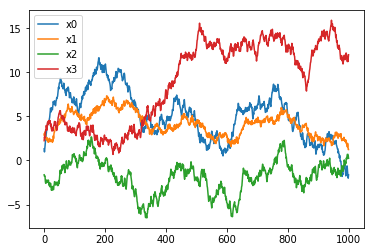

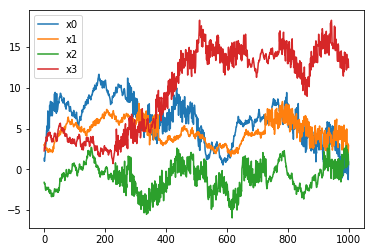

,x0,x1,x2,x3
0,1.330106,3.000000,-1.618891,2.244998
1,0.970960,2.790380,-1.795467,2.680267
2,1.291141,3.230361,-1.730158,2.530218
3,1.688795,3.030049,-1.902327,2.912778
4,2.117202,3.101420,-2.401386,3.129198
5,3.022824,2.531633,-2.587374,3.499921
6,3.170224,2.542660,-2.584866,3.482068
7,3.909552,2.368553,-2.213396,3.974022
8,4.766701,2.322347,-2.312049,3.697179
9,4.544007,2.601257,-2.461260,3.443867


In [12]:
def generate_variance_outliers():
    STREAM_LENGTH = 1000
    N = 4
    K = 2
    
    dg = MultivariateDataGenerator(STREAM_LENGTH, N, K, shift_config={1: 25, 2:20})
    df = dg.generate_baseline(initial_value_min=-4, initial_value_max=4)

    for col in df.columns:
        plt.plot(df[col], label=col)
    plt.legend()
    plt.show()
    
    df['y'] = np.zeros(STREAM_LENGTH)

    for timeseries in range(N):
        num_outliers = 10
        outlier_pos = random.sample(range(STREAM_LENGTH), num_outliers)

        timestamps = []
        for i in range(0, len(outlier_pos), 2):
            timestamps.append((outlier_pos[i], outlier_pos[i+1]))

        df = dg.add_outliers({'variance': [{'n': timeseries, 'timestamps': timestamps}]})

    for col in df.columns:
        plt.plot(df[col], label=col)
    plt.legend()
    plt.show()
    return df
generate_variance_outliers()

In [13]:
def generate_outliers():
    return (generate_extreme_outliers(), generate_shift_outliers(), generate_trend_outliers(), generate_variance_outliers())